# Kwanza Tukule Data Analyst Assessment

## Introduction

This notebook presents the analysis and insights derived from the anonymized sales dataset provided by Kwanza Tukule. The assessment involves evaluating technical, analytical, and problem-solving skills through various tasks such as data cleaning, exploratory analysis, advanced analysis, and visualization. 

### Objectives:
1. Perform data cleaning and preparation to ensure the dataset is ready for analysis.
2. Conduct exploratory data analysis (EDA) to uncover patterns and trends in sales performance.
3. Perform advanced analyses, including customer segmentation, forecasting, and anomaly detection.
4. Provide strategic insights and actionable recommendations based on the analysis.
5. Develop a dashboard summarizing key findings to aid decision-making.

### Tools and Technologies:
- **Python**: For data cleaning, analysis, and visualizations.
- **Libraries**: Pandas, NumPy, Matplotlib, Seaborn, Plotly, and Scikit-learn.
- **Jupyter Notebook**: For interactive and well-documented analysis.

The following sections will detail the approach and findings for each task outlined in the assessment instructions.


In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import zscore
from scipy.stats import pearsonr
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px


## **Section 1: Data Cleaning and Preparation (20 points)**


In [2]:
# Load the data
df = pd.read_excel('./Case Study Data - Read Only.xlsx')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

# Display the number of rows and columns in the dataset
print("\nNumber of Rows and Columns in the Dataset:")
print(df.shape)

# Display the column names in the dataset
print("\nColumn Names in the Dataset:")
print(df.columns)

# Check for basic information and data types
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows:")
print(df.duplicated().sum())


Dataset Preview:
                 DATE ANONYMIZED CATEGORY ANONYMIZED PRODUCT  \
0 2024-08-18 21:32:00        Category-106       Product-21f4   
1 2024-08-18 21:32:00        Category-120       Product-4156   
2 2024-08-18 21:32:00        Category-121       Product-49bd   
3 2024-08-18 21:32:00         Category-76       Product-61dd   
4 2024-08-18 21:32:00        Category-119       Product-66e0   

  ANONYMIZED BUSINESS ANONYMIZED LOCATION  QUANTITY  UNIT PRICE  
0       Business-de42       Location-1ba8         1       850.0  
1       Business-de42       Location-1ba8         2      1910.0  
2       Business-de42       Location-1ba8         1      3670.0  
3       Business-de42       Location-1ba8         1      2605.0  
4       Business-de42       Location-1ba8         5      1480.0  

Number of Rows and Columns in the Dataset:
(333405, 7)

Column Names in the Dataset:
Index(['DATE', 'ANONYMIZED CATEGORY', 'ANONYMIZED PRODUCT',
       'ANONYMIZED BUSINESS', 'ANONYMIZED LOCATION', 'QU

From the inspection:
1. Missing Values are found in the UNIT PRICE column having 8 missing values.
2. There are 3,524 duplicate rows in the dataset.


In [3]:

print(df['UNIT PRICE'].describe())

count    333397.000000
mean       2322.039538
std        1585.256624
min           0.000000
25%        1420.000000
50%        1840.000000
75%        2755.000000
max       16136.000000
Name: UNIT PRICE, dtype: float64


Since the missing values account for only 8 rows out of 333,405 (0.0024%), filling them with the mean is a more reasonable approach. This ensures continuity in the column for analysis. Additionally, given the size of the dataset, the mean serves as a reliable central value without significantly affecting the overall distribution.

For the duplicate rows, we will proceed to drop them to ensure data quality and avoid redundancy.



In [4]:
# Remove duplicate rows
df = df.drop_duplicates()
print(f"Duplicates removed. Remaining rows: {df.shape[0]}")

# Handle missing values in 'UNIT PRICE'
# Option 1: Replace missing values with the mean of the column
mean_unit_price = df['UNIT PRICE'].mean()
df['UNIT PRICE'] = df['UNIT PRICE'].fillna(mean_unit_price)

# Option 2: Drop rows with missing values (uncomment if preferred)
# df = df.dropna(subset=['UNIT PRICE'])

print(f"Missing values in 'UNIT PRICE' handled. Remaining missing values: {df['UNIT PRICE'].isnull().sum()}")

Duplicates removed. Remaining rows: 329881
Missing values in 'UNIT PRICE' handled. Remaining missing values: 0


### Data Quality Assessment

1. **Missing Values**:  
   - The **'UNIT PRICE'** column had 8 missing values.
   - **Action Taken**: These missing values were filled with the **mean** of the column, as the dataset is large and the mean is a reliable central value.

2. **Duplicate Rows**:  
   - There were **3,524 duplicate rows** in the dataset.
   - **Action Taken**: The duplicate rows were removed, reducing the dataset to **329,881 rows**.

3. **Remaining Issues**:  
   - After handling the missing values and removing duplicates, there are **no remaining missing values** in the dataset.


Feature Engineering: Create the following columns: “Month-Year” (e.g., August 2024) from the “DATE” column.

In [5]:
# Create a 'Month-Year' column
df['Month-Year'] = df['DATE'].dt.strftime('%B %Y')

# Display the first few rows to verify
print("\nDataset with 'Month-Year' column added:")
print(df[['DATE', 'Month-Year']].head())



Dataset with 'Month-Year' column added:
                 DATE   Month-Year
0 2024-08-18 21:32:00  August 2024
1 2024-08-18 21:32:00  August 2024
2 2024-08-18 21:32:00  August 2024
3 2024-08-18 21:32:00  August 2024
4 2024-08-18 21:32:00  August 2024


In [6]:
df.head()

DATE ANONYMIZED CATEGORY ANONYMIZED PRODUCT  \
0 2024-08-18 21:32:00        Category-106       Product-21f4   
1 2024-08-18 21:32:00        Category-120       Product-4156   
2 2024-08-18 21:32:00        Category-121       Product-49bd   
3 2024-08-18 21:32:00         Category-76       Product-61dd   
4 2024-08-18 21:32:00        Category-119       Product-66e0   

  ANONYMIZED BUSINESS ANONYMIZED LOCATION  QUANTITY  UNIT PRICE   Month-Year  
0       Business-de42       Location-1ba8         1       850.0  August 2024  
1       Business-de42       Location-1ba8         2      1910.0  August 2024  
2       Business-de42       Location-1ba8         1      3670.0  August 2024  
3       Business-de42       Location-1ba8         1      2605.0  August 2024  
4       Business-de42       Location-1ba8         5      1480.0  August 2024

In [7]:
# Filtering for another month, the month of September 2024, for example
df_september = df[df['Month-Year'] == 'September 2024']

# Display the first few rows of September 2024
print(df_september.head())

                  DATE ANONYMIZED CATEGORY ANONYMIZED PRODUCT  \
17 2024-09-06 08:42:00         Category-75       Product-6aa1   
18 2024-09-06 08:42:00         Category-76       Product-c570   
19 2024-09-06 08:42:00        Category-100       Product-f3ee   
21 2024-09-05 19:48:00        Category-120       Product-14f3   
22 2024-09-05 19:48:00        Category-120       Product-9a3e   

   ANONYMIZED BUSINESS ANONYMIZED LOCATION  QUANTITY  UNIT PRICE  \
17       Business-f13b       Location-bb69         1      2255.0   
18       Business-f13b       Location-bb69         1      2540.0   
19       Business-f13b       Location-bb69         1      1880.0   
21       Business-5d3e       Location-1979         5      1740.0   
22       Business-5d3e       Location-1979         5      1695.0   

        Month-Year  
17  September 2024  
18  September 2024  
19  September 2024  
21  September 2024  
22  September 2024  


## **Section 2: Exploratory Data Analysis (30 points)**

### 1. **Sales Overview:**

We'll calculate the total **Quantity** and **Value** (Quantity × Unit Price) grouped by:
- **Anonymized Category**
- **Anonymized Business**

In [8]:
df.columns

Index(['DATE', 'ANONYMIZED CATEGORY', 'ANONYMIZED PRODUCT',
       'ANONYMIZED BUSINESS', 'ANONYMIZED LOCATION', 'QUANTITY', 'UNIT PRICE',
       'Month-Year'],
      dtype='object')

In [9]:
# Calculate the total Quantity and Value grouped by Anonymized Category
df['VALUE'] = df['QUANTITY'] * df['UNIT PRICE']  # Calculate Value

category_sales = df.groupby('ANONYMIZED CATEGORY')[['QUANTITY', 'VALUE']].sum().reset_index()

# Calculate the total Quantity and Value grouped by Anonymized Business
business_sales = df.groupby('ANONYMIZED BUSINESS')[['QUANTITY', 'VALUE']].sum().reset_index()

# Display the top 5 categories and businesses
print("Sales by Anonymized Category:")
print(category_sales.head())

print("\nSales by Anonymized Business:")
print(business_sales.head())


Sales by Anonymized Category:
  ANONYMIZED CATEGORY  QUANTITY         VALUE
0        Category-100     76824  1.349028e+08
1        Category-101     19585  3.562652e+07
2        Category-102      1786  4.644630e+05
3        Category-104      1217  1.557598e+06
4        Category-105      1579  2.690719e+06

Sales by Anonymized Business:
  ANONYMIZED BUSINESS  QUANTITY     VALUE
0       Business-0000         8   10445.0
1       Business-0005         1    2645.0
2       Business-0029        26   77340.0
3       Business-003d        98  221761.0
4       Business-0072       127  225056.0


In [10]:
category_sales['ANONYMIZED CATEGORY'].unique()

array(['Category-100', 'Category-101', 'Category-102', 'Category-104',
       'Category-105', 'Category-106', 'Category-107', 'Category-108',
       'Category-109', 'Category-110', 'Category-111', 'Category-113',
       'Category-114', 'Category-115', 'Category-116', 'Category-117',
       'Category-118', 'Category-119', 'Category-120', 'Category-121',
       'Category-122', 'Category-123', 'Category-124', 'Category-125',
       'Category-74', 'Category-75', 'Category-76', 'Category-77',
       'Category-78', 'Category-79', 'Category-81', 'Category-82',
       'Category-83', 'Category-84', 'Category-85', 'Category-86',
       'Category-89', 'Category-90', 'Category-91', 'Category-92',
       'Category-94', 'Category-95', 'Category-96', 'Category-97',
       'Category-98', 'Category-99'], dtype=object)

In [11]:
business_sales['ANONYMIZED BUSINESS'].unique()

array(['Business-0000', 'Business-0005', 'Business-0029', ...,
       'Business-ffb1', 'Business-ffd2', 'Business-ffff'], dtype=object)

Visualizations (e.g., bar charts or tables) to support the findings.

In [12]:
print(df.isnull().sum())

DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             0
Month-Year             0
VALUE                  0
dtype: int64


In [13]:
df.columns

Index(['DATE', 'ANONYMIZED CATEGORY', 'ANONYMIZED PRODUCT',
       'ANONYMIZED BUSINESS', 'ANONYMIZED LOCATION', 'QUANTITY', 'UNIT PRICE',
       'Month-Year', 'VALUE'],
      dtype='object')

In [14]:
business_sales.head()

ANONYMIZED BUSINESS  QUANTITY     VALUE
0       Business-0000         8   10445.0
1       Business-0005         1    2645.0
2       Business-0029        26   77340.0
3       Business-003d        98  221761.0
4       Business-0072       127  225056.0

In [15]:
category_sales.head()

ANONYMIZED CATEGORY  QUANTITY         VALUE
0        Category-100     76824  1.349028e+08
1        Category-101     19585  3.562652e+07
2        Category-102      1786  4.644630e+05
3        Category-104      1217  1.557598e+06
4        Category-105      1579  2.690719e+06

Display top 10 categories/businesses by value and quantity

C:\Users\HomePC\AppData\Local\Temp\ipykernel_6472\3688633967.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


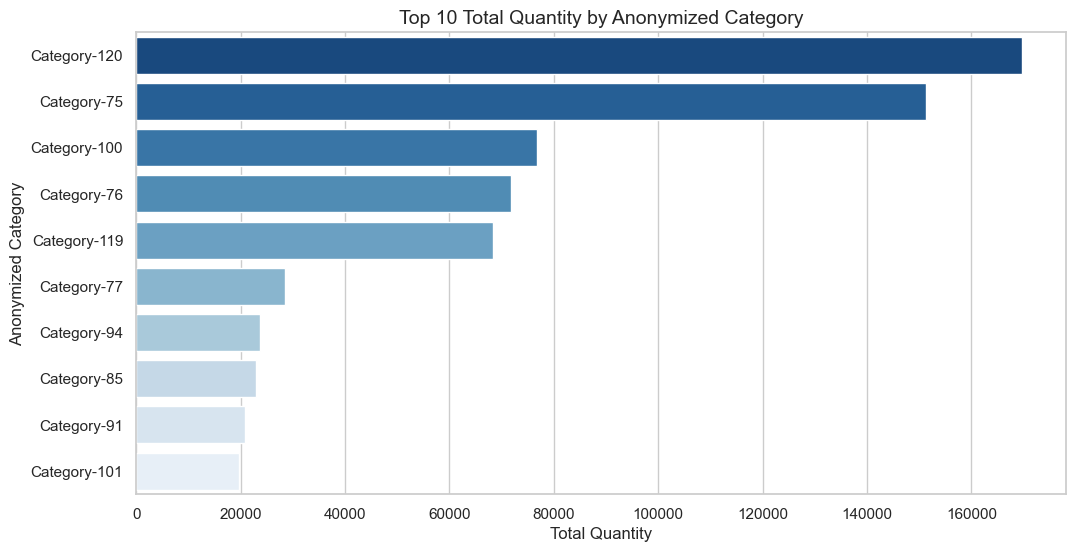

C:\Users\HomePC\AppData\Local\Temp\ipykernel_6472\3688633967.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


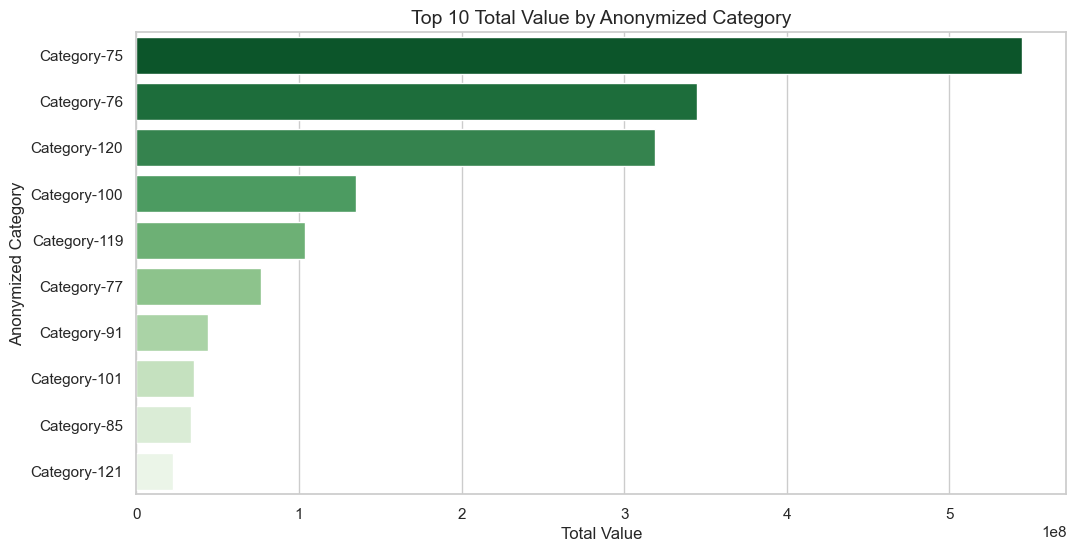

C:\Users\HomePC\AppData\Local\Temp\ipykernel_6472\3688633967.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


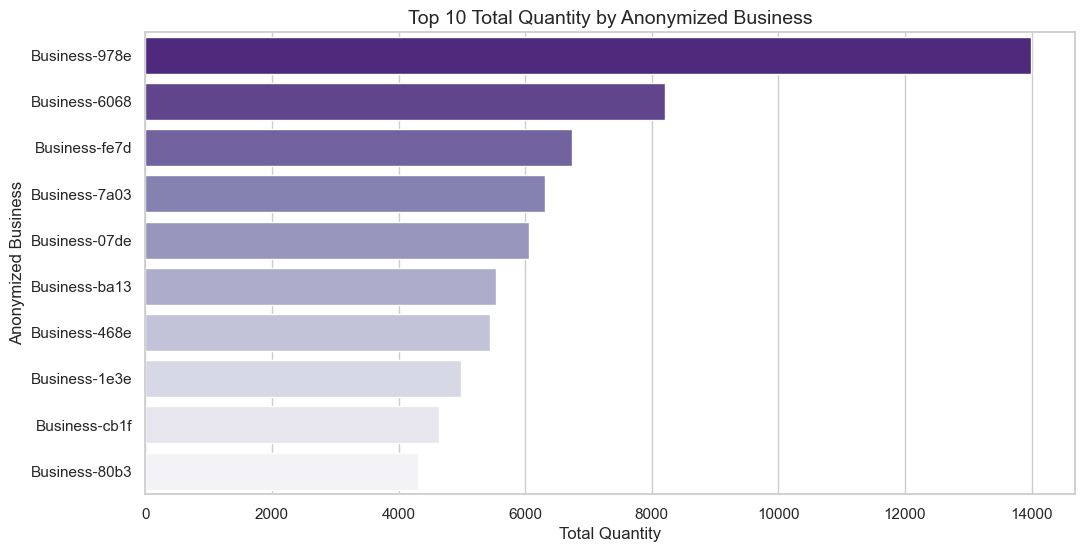

C:\Users\HomePC\AppData\Local\Temp\ipykernel_6472\3688633967.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


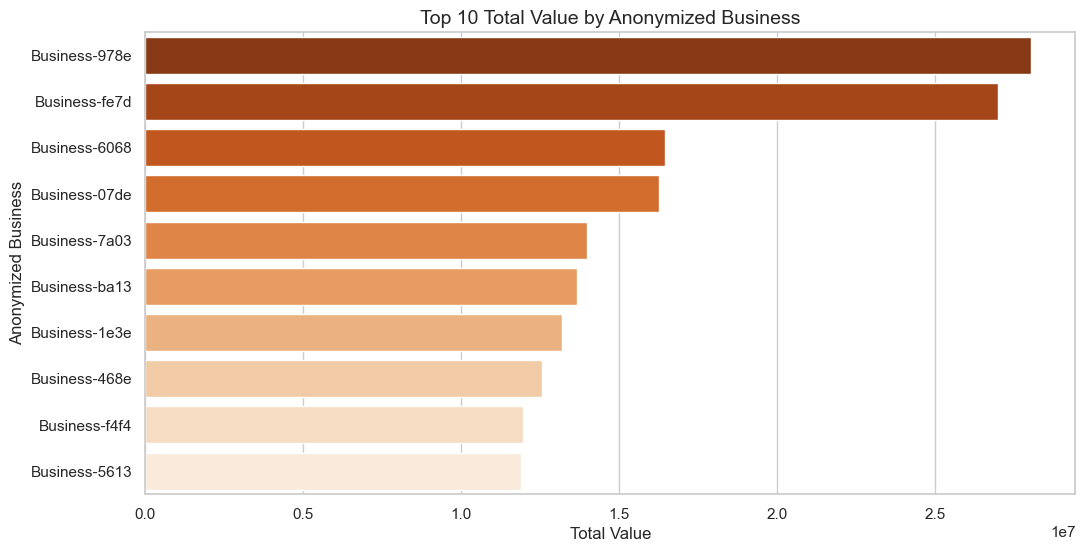

In [16]:
# Set a style for the plots
sns.set_theme(style="whitegrid")

# Define the number of top categories/businesses to display
top_n = 10

# Filter for top categories by Quantity and Value
top_categories_quantity = category_sales.nlargest(top_n, 'QUANTITY')
top_categories_value = category_sales.nlargest(top_n, 'VALUE')

# Bar chart for Top N Total Quantity by Anonymized Category
plt.figure(figsize=(12, 6))
sns.barplot(
    x='QUANTITY', 
    y='ANONYMIZED CATEGORY', 
    data=top_categories_quantity.sort_values('QUANTITY', ascending=False), 
    palette='Blues_r'
)
plt.title(f'Top {top_n} Total Quantity by Anonymized Category', fontsize=14)
plt.xlabel('Total Quantity')
plt.ylabel('Anonymized Category')
plt.show()

# Bar chart for Top N Total Value by Anonymized Category
plt.figure(figsize=(12, 6))
sns.barplot(
    x='VALUE', 
    y='ANONYMIZED CATEGORY', 
    data=top_categories_value.sort_values('VALUE', ascending=False), 
    palette='Greens_r'
)
plt.title(f'Top {top_n} Total Value by Anonymized Category', fontsize=14)
plt.xlabel('Total Value')
plt.ylabel('Anonymized Category')
plt.show()

# Filter for top businesses by Quantity and Value
top_businesses_quantity = business_sales.nlargest(top_n, 'QUANTITY')
top_businesses_value = business_sales.nlargest(top_n, 'VALUE')

# Bar chart for Top N Total Quantity by Anonymized Business
plt.figure(figsize=(12, 6))
sns.barplot(
    x='QUANTITY', 
    y='ANONYMIZED BUSINESS', 
    data=top_businesses_quantity.sort_values('QUANTITY', ascending=False), 
    palette='Purples_r'
)
plt.title(f'Top {top_n} Total Quantity by Anonymized Business', fontsize=14)
plt.xlabel('Total Quantity')
plt.ylabel('Anonymized Business')
plt.show()

# Bar chart for Top N Total Value by Anonymized Business
plt.figure(figsize=(12, 6))
sns.barplot(
    x='VALUE', 
    y='ANONYMIZED BUSINESS', 
    data=top_businesses_value.sort_values('VALUE', ascending=False), 
    palette='Oranges_r'
)
plt.title(f'Top {top_n} Total Value by Anonymized Business', fontsize=14)
plt.xlabel('Total Value')
plt.ylabel('Anonymized Business')
plt.show()


## Interpretation of Top 10 Categories and Businesses

### Top 10 Total Quantity by Anonymized Category
From the visualization:
- **Category-120** is the most dominant in terms of total quantity, highlighting its significant role in overall sales volume.  
- **Category-101** ranks lowest among the top 10, indicating a much smaller contribution compared to the leading categories.  
- A **notable drop in quantity** is observed between **Category-119** and **Category-77**, which could suggest differences in classification or demand patterns. This may require further analysis to understand the underlying cause.  

---

### Top 10 Total Value by Anonymized Category
From the visualization:
- **Category-75** stands out as the leader in terms of total value, emphasizing its strong economic or market significance.  
- **Category-121** records the lowest total value among the top 10, reflecting its comparatively smaller revenue contribution.  
- A **significant drop in value** occurs between **Category-76** and **Category-120**, which may indicate a disparity in the pricing, product quality, or target market of these categories.  

---

### Top 10 Total Quantity by Anonymized Business
From the visualization:
- **Business-978e** leads substantially in terms of total quantity, demonstrating its dominance in product distribution or sales volume.  
- **Business-80b3** is at the bottom of the top 10 list, indicating a relatively lower quantity contribution.  

---

### Top 10 Total Value by Anonymized Business
From the visualization:
- **Business-978e** also dominates in terms of total value, solidifying its position as a significant contributor to overall sales performance.  
- **Business-5613** records the lowest total value among the top 10, reflecting its smaller economic impact.  

---

### Key Observations
- The dominance of certain categories and businesses in both quantity and value highlights the need to focus on their performance and strategies to sustain or enhance their impact.  
- The disparities observed (e.g., between Categories-119 and 77, and Businesses-978e and 5613) could provide insights into market segmentation, customer preferences, or operational efficiencies that merit further exploration.


Display bottom 10 categories/businesses by value and quantity

C:\Users\HomePC\AppData\Local\Temp\ipykernel_6472\1183488345.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


C:\Users\HomePC\AppData\Local\Temp\ipykernel_6472\1183488345.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


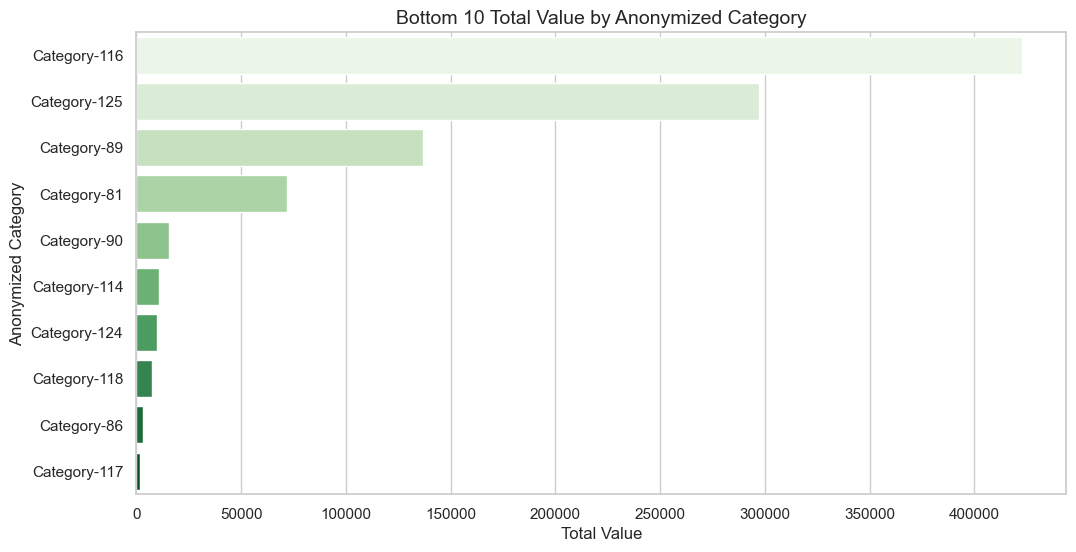

C:\Users\HomePC\AppData\Local\Temp\ipykernel_6472\1183488345.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


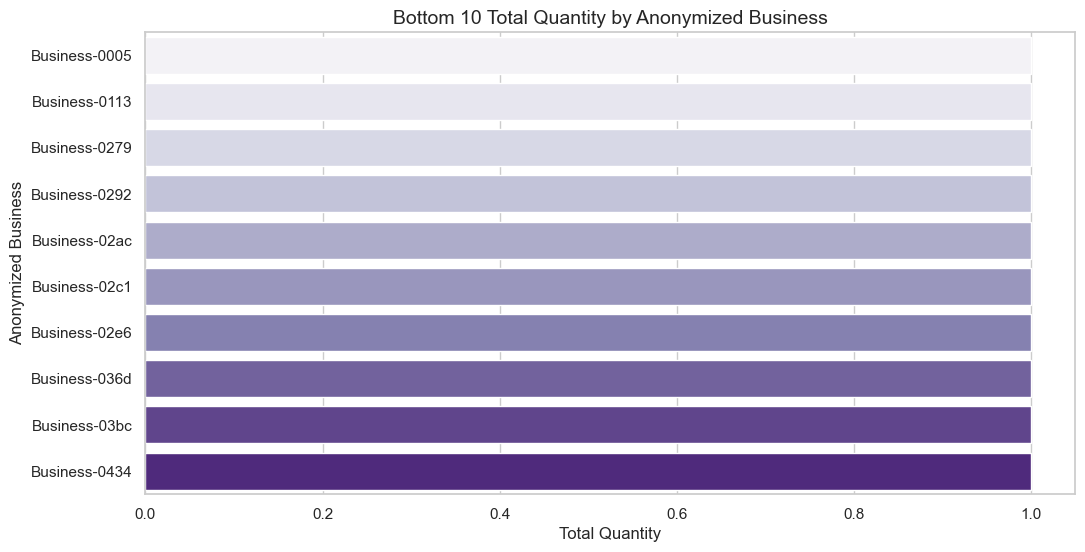

C:\Users\HomePC\AppData\Local\Temp\ipykernel_6472\1183488345.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


In [17]:
# Define the number of bottom categories/businesses to display
bottom_n = 10

# Filter for bottom categories by Quantity and Value
bottom_categories_quantity = category_sales.nsmallest(bottom_n, 'QUANTITY')
bottom_categories_value = category_sales.nsmallest(bottom_n, 'VALUE')

# Bar chart for Bottom N Total Quantity by Anonymized Category
plt.figure(figsize=(12, 6))
sns.barplot(
    x='QUANTITY', 
    y='ANONYMIZED CATEGORY', 
    data=bottom_categories_quantity.sort_values('QUANTITY', ascending=False), 
    palette='Blues'
)
plt.title(f'Bottom {bottom_n} Total Quantity by Anonymized Category', fontsize=14)
plt.xlabel('Total Quantity')
plt.ylabel('Anonymized Category')
plt.show()

# Bar chart for Bottom N Total Value by Anonymized Category
plt.figure(figsize=(12, 6))
sns.barplot(
    x='VALUE', 
    y='ANONYMIZED CATEGORY', 
    data=bottom_categories_value.sort_values('VALUE', ascending=False), 
    palette='Greens'
)
plt.title(f'Bottom {bottom_n} Total Value by Anonymized Category', fontsize=14)
plt.xlabel('Total Value')
plt.ylabel('Anonymized Category')
plt.show()

# Filter for bottom businesses by Quantity and Value
bottom_businesses_quantity = business_sales.nsmallest(bottom_n, 'QUANTITY')
bottom_businesses_value = business_sales.nsmallest(bottom_n, 'VALUE')

# Bar chart for Bottom N Total Quantity by Anonymized Business
plt.figure(figsize=(12, 6))
sns.barplot(
    x='QUANTITY', 
    y='ANONYMIZED BUSINESS', 
    data=bottom_businesses_quantity.sort_values('QUANTITY', ascending=False), 
    palette='Purples'
)
plt.title(f'Bottom {bottom_n} Total Quantity by Anonymized Business', fontsize=14)
plt.xlabel('Total Quantity')
plt.ylabel('Anonymized Business')
plt.show()

# Bar chart for Bottom N Total Value by Anonymized Business
plt.figure(figsize=(12, 6))
sns.barplot(
    x='VALUE', 
    y='ANONYMIZED BUSINESS', 
    data=bottom_businesses_value.sort_values('VALUE', ascending=False), 
    palette='Oranges'
)
plt.title(f'Bottom {bottom_n} Total Value by Anonymized Business', fontsize=14)
plt.xlabel('Total Value')
plt.ylabel('Anonymized Business')
plt.show()


## Interpretation of Bottom 10 Categories and Businesses

### Bottom 10 Total Quantity by Anonymized Category
- **Category-124** ranks the lowest in total quantity among the bottom 10, sharing this position with **Category-114** due to a tie.  
- This indicates minimal contribution from these categories, which may require attention to understand potential challenges or limitations in their performance.

---

### Bottom 10 Total Value by Anonymized Category
- **Category-117** ranks last in terms of total value, closely followed by **Category-86**.  
- These categories contribute very little in terms of economic significance, highlighting a potential need for targeted strategies to boost their revenue.

---

### Bottom 10 Total Quantity by Anonymized Business
- Among the bottom 10 businesses, there is a **tie of 1 item**, indicating multiple businesses with equally minimal contributions to the overall sales quantity.  
- These businesses could represent untapped potential or inefficiencies that require deeper analysis.

---

### Bottom 10 Total Value by Anonymized Business
- **Business-f712** has the lowest total value, recording a value of **0**, followed by **Business-d78d**.  
- Businesses with such low contributions may need to be reevaluated for their viability, marketing, or operational strategies.

---

In [18]:
df.columns

Index(['DATE', 'ANONYMIZED CATEGORY', 'ANONYMIZED PRODUCT',
       'ANONYMIZED BUSINESS', 'ANONYMIZED LOCATION', 'QUANTITY', 'UNIT PRICE',
       'Month-Year', 'VALUE'],
      dtype='object')


Trends Over Time: Analyze sales trends (Value and Quantity) by Month-Year. Create a time series plot to show seasonal patterns or changes in sales performance.

Step 1: Aggregate the data by Month-Year
Calculate the total Quantity and Value for each month, allowing us to observe trends over time.

Step 2: Plot the trends
Create a time series plot that shows both sales value and quantity over time, so we can spot any seasonal patterns or changes in sales performance

In [19]:
df.dtypes

DATE                   datetime64[ns]
ANONYMIZED CATEGORY            object
ANONYMIZED PRODUCT             object
ANONYMIZED BUSINESS            object
ANONYMIZED LOCATION            object
QUANTITY                        int64
UNIT PRICE                    float64
Month-Year                     object
VALUE                         float64
dtype: object

In [20]:
# Convert 'Month-Year' to datetime format if it's not already
df['Month-Year'] = pd.to_datetime(df['Month-Year'], errors='coerce', format='%B %Y')

# Check if the conversion was successful
print(df['Month-Year'].head())

# Create the 'Month-Year-Formatted' column for display in the desired format
df['Month-Year-Formatted'] = df['Month-Year'].dt.strftime('%B %Y')

# Aggregate the data by 'Month-Year'
monthly_sales = df.groupby('Month-Year').agg({'QUANTITY': 'sum', 'VALUE': 'sum'}).reset_index()

# Add the formatted 'Month-Year-Formatted' column for display
monthly_sales['Month-Year-Formatted'] = monthly_sales['Month-Year'].dt.strftime('%B %Y')

# Sort the data by 'Month-Year' for chronological order
monthly_sales.sort_values('Month-Year', ascending=True, inplace=True)

# Plot the sales trends
plt.figure(figsize=(14, 7))

# Plot Quantity over time
plt.subplot(2, 1, 1)
plt.plot(monthly_sales['Month-Year-Formatted'], monthly_sales['QUANTITY'], marker='o', color='b', label='Quantity')
plt.title('Monthly Sales Trends - Quantity')
plt.xlabel('Month-Year')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)

# Plot Value over time
plt.subplot(2, 1, 2)
plt.plot(monthly_sales['Month-Year-Formatted'], monthly_sales['VALUE'], marker='o', color='g', label='Value')
plt.title('Monthly Sales Trends - Value')
plt.xlabel('Month-Year')
plt.ylabel('Total Value')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


0   2024-08-01
1   2024-08-01
2   2024-08-01
3   2024-08-01
4   2024-08-01
Name: Month-Year, dtype: datetime64[ns]


## Chart 1: Monthly Sales Trends - Quantity

### Overall Trend:
The quantity of sales exhibits a notable drop from January to February, followed by a steady increase until October. There is a sharp decline in both November and December, suggesting possible seasonal trends or external factors impacting sales.

### Key Insights:
- **Lowest Point:** The quantity reaches its lowest in February.
- **Peak:** The highest sales quantity occurs in October.
- **Seasonality:** December shows a significant drop, with values lower than January, indicating a potential seasonal pattern affecting sales.

---

## Chart 2: Monthly Sales Trends - Value

### Overall Trend:
The value of sales mirrors the quantity chart in its overall movement, with a steep drop in February, gradual growth through October, and a sharp decline in the final months of the year, particularly in November and December.

### Key Insights:
- **Lowest Point:** The sales value is lowest in March.
- **Peak:** The highest sales value is observed in October.
- **Seasonality:** The December value is notably lower than January, reinforcing the presence of a strong seasonal influence on sales.

---

## Comparison of Charts

Both charts reveal similar trends: 
1. A **drop** in February
2. **Growth** until October
3. A **sharp decline** in November and December.

### Key Takeaways:
- **Relationship between Quantity and Value:** The quantity and value of sales are closely aligned, indicating that higher quantities tend to correlate with higher value sales.
- **Volatility:** The sales value chart exhibits more volatility compared to the quantity chart, showing larger fluctuations in values. This suggests that the pricing or product mix may have contributed to larger variations in sales value.


## Performance Analysis:

To identify the top 5 most frequently purchased products (based on Quantity) and the top 5 most valuable products (based on Value), group the data by ANONYMIZED PRODUCT and then sum the QUANTITY and VALUE columns. After that, sort the results to get the top 5 for each criterion.

In [21]:
# Group by 'ANONYMIZED PRODUCT' and calculate total Quantity and Value
product_sales = df.groupby('ANONYMIZED PRODUCT').agg(
    Total_Quantity=('QUANTITY', 'sum'),
    Total_Value=('VALUE', 'sum')
).reset_index()

# Get top 5 products by Quantity (most frequently purchased)
top_5_quantity = product_sales.sort_values(by='Total_Quantity', ascending=False).head(5)

# Get top 5 products by Value (most valuable products)
top_5_value = product_sales.sort_values(by='Total_Value', ascending=False).head(5)

# Display the results
print("Top 5 Most Frequently Purchased Products (Based on Quantity):")
print(top_5_quantity)

print("\nTop 5 Most Valuable Products (Based on Value):")
print(top_5_value)


Top 5 Most Frequently Purchased Products (Based on Quantity):
    ANONYMIZED PRODUCT  Total_Quantity  Total_Value
339       Product-66e0           46957   70704225.0
753       Product-e805           42602  262787281.0
477       Product-8f75           37566  158797460.0
128       Product-29ee           35940   68248274.0
214       Product-4156           28487   56956007.0

Top 5 Most Valuable Products (Based on Value):
    ANONYMIZED PRODUCT  Total_Quantity  Total_Value
753       Product-e805           42602  262787281.0
477       Product-8f75           37566  158797460.0
339       Product-66e0           46957   70704225.0
128       Product-29ee           35940   68248274.0
214       Product-4156           28487   56956007.0


### Key Observations:
- **Product-e805** emerges as the most valuable product, suggesting that it could be a premium product with a higher price per unit, contributing to its higher total value.
- While **Product-66e0** ranks first in quantity, it falls to third in terms of value, possibly due to lower pricing or less profit margin.
- The other products follow a similar trend, where the most frequently purchased items (in terms of quantity) may not necessarily be the most valuable, indicating varying price points or market strategies.


# **Section 3: Advanced Analysis (30 points)**

### Step 1: Data Preparation
To perform customer segmentation based on purchasing behavior, aggregate the data based on the ANONYMIZED BUSINESS column and calculate the following metrics:
- **Total Quantity Purchased**: Sum of quantities for each business.
- **Total Value Contributed**: Sum of the value for each business.
- **Frequency of Transactions**: Count of unique dates (or entries) for each business, which represents how frequently they make purchases.

### Step 2: Calculating Segmentation Metrics
We'll calculate:
- **Total Quantity Purchased**: This will be the sum of quantities for each business.
- **Total Value Contributed**: This will be the sum of the value for each business.
- **Frequency of Transactions**: This will be the count of unique dates or entries for each business, representing how often they make purchases.

### Step 3: Segmentation Strategy
We will classify the businesses into 3 groups:
1. **High Value**: Businesses with high total value and total quantity.
2. **Medium Value**: Businesses with moderate total value and quantity.
3. **Low Value**: Businesses with low total value and quantity.

### Step 4: Segmentation Model
Use thresholds (quantiles, for example) to classify the businesses into the above segments. The thresholds will be based on the total value and total quantity, and businesses will be classified accordingly.


In [22]:
# Grouping by 'ANONYMIZED BUSINESS' and calculating total quantity, value, and frequency
business_segmentation = df.groupby('ANONYMIZED BUSINESS').agg(
    Total_Quantity=('QUANTITY', 'sum'),
    Total_Value=('VALUE', 'sum'),
    Frequency=('DATE', 'nunique')
).reset_index()

# Define thresholds for segmentation based on Total Value and Total Quantity
high_value_threshold = business_segmentation['Total_Value'].quantile(0.75)
medium_value_threshold = business_segmentation['Total_Value'].quantile(0.50)

high_quantity_threshold = business_segmentation['Total_Quantity'].quantile(0.75)
medium_quantity_threshold = business_segmentation['Total_Quantity'].quantile(0.50)

# Create a new column 'Segment' to classify the businesses
def classify_business(row):
    if row['Total_Value'] >= high_value_threshold and row['Total_Quantity'] >= high_quantity_threshold:
        return 'High Value'
    elif row['Total_Value'] >= medium_value_threshold and row['Total_Quantity'] >= medium_quantity_threshold:
        return 'Medium Value'
    else:
        return 'Low Value'

business_segmentation['Segment'] = business_segmentation.apply(classify_business, axis=1)

# Display the segmented data
segment = business_segmentation[['ANONYMIZED BUSINESS', 'Total_Quantity', 'Total_Value', 'Frequency', 'Segment']]
print(segment.head())


  ANONYMIZED BUSINESS  Total_Quantity  Total_Value  Frequency       Segment
0       Business-0000               8      10445.0          5     Low Value
1       Business-0005               1       2645.0          1     Low Value
2       Business-0029              26      77340.0          4  Medium Value
3       Business-003d              98     221761.0         16  Medium Value
4       Business-0072             127     225056.0         54  Medium Value


Create three separate DataFrames for each segment:

In [23]:
# Separate the data into three segments based on 'Segment' column
high_value = segment[segment['Segment'] == 'High Value']
medium_value = segment[segment['Segment'] == 'Medium Value']
low_value = segment[segment['Segment'] == 'Low Value']

# Display the segmented data
print("High Value Segment:")
print(high_value.head())

print("\nMedium Value Segment:")
print(medium_value.head())

print("\nLow Value Segment:")
print(low_value.head())


High Value Segment:
   ANONYMIZED BUSINESS  Total_Quantity  Total_Value  Frequency     Segment
5        Business-0078             317    1056525.0        159  High Value
14       Business-00fa             180     334250.0          4  High Value
16       Business-0109             279    1006802.0         49  High Value
19       Business-013f             136     292275.0         38  High Value
23       Business-016c             492     923462.0        154  High Value

Medium Value Segment:
   ANONYMIZED BUSINESS  Total_Quantity  Total_Value  Frequency       Segment
2        Business-0029              26      77340.0          4  Medium Value
3        Business-003d              98     221761.0         16  Medium Value
4        Business-0072             127     225056.0         54  Medium Value
12       Business-00e7              29      85643.0          5  Medium Value
15       Business-0105              41      88285.0         11  Medium Value

Low Value Segment:
  ANONYMIZED BUSINESS  To

### Step 5: Recommendations

After segmenting businesses, recommendations for engagement with each group are:

#### High Value:
- Focus on maintaining relationships and offering loyalty programs or exclusive deals.
- Offer personalized services or premium products to strengthen the partnership.

#### Medium Value:
- Offer targeted promotions and incentives to increase their purchasing volume and value.
- Provide special offers for volume-based discounts to move them into the high-value category.

#### Low Value:
- Identify the reasons behind lower engagement, such as budget constraints or less frequent purchases.
- Offer entry-level products, discounts, or incentives to encourage more frequent purchases.


Forecasting: Using the provided data, forecast the total sales (Value) for the next 3 months. Use an appropriate time-series forecasting method (e.g., ARIMA, moving average, or exponential smoothing).

# **Proceed with an ARIMA model for forecasting total sales (Value).**

In [24]:
df.columns

Index(['DATE', 'ANONYMIZED CATEGORY', 'ANONYMIZED PRODUCT',
       'ANONYMIZED BUSINESS', 'ANONYMIZED LOCATION', 'QUANTITY', 'UNIT PRICE',
       'Month-Year', 'VALUE', 'Month-Year-Formatted'],
      dtype='object')

Step 1: Check for Stationarity

First, Check whether the sales value data is stationary by using the Augmented Dickey-Fuller (ADF) Test. If the series is not stationary, perform differencing to make it stationary.

In [25]:
# Perform the ADF test on the 'Value' column
result = adfuller(df['VALUE'])

# Print ADF test results
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Interpretation of the results
if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary. Differencing is required.")


ADF Statistic: -241.668125103738
p-value: 0.0
The series is stationary.


As the series is stationary, no differencing is required, proceed fitting the seasonal arima mode4l

# **Step 2: Fit the Seasonal ARIMA Model**

We need to identify the optimal parameters (p, d, q) for the ARIMA model and the seasonal parameters (P, D, Q, m), where:

- p: the number of lag observations in the model (AR term)
- d: the number of times that the raw observations are differenced (I term)
- q: the size of the moving average window (MA term)
- P, D, Q, m: seasonal components of the model (Seasonal AR, Seasonal MA, seasonal differencing, and number of periods in each season)

In [26]:
# Now, proceed to fit a SARIMA model (p, d, q) x (P, D, Q, S)
p, d, q = 1, 1, 1  # Non-seasonal orders
P, D, Q, S = 1, 1, 1, 12  # Seasonal order (S=12 for monthly data)

# Fit SARIMA model for 'VALUE' (sales value)
model = SARIMAX(monthly_sales['VALUE'], order=(p, d, q), seasonal_order=(P, D, Q, S))
model_fit = model.fit()

# Forecast for the next 3 months
forecast_steps = 3
forecast = model_fit.forecast(steps=forecast_steps)

# Generate future dates (corrected way)
last_date = monthly_sales['Month-Year'].iloc[-1]  # Use the last date of 'Month-Year' column
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=forecast_steps, freq='M')

# Create forecasted data series
forecast_series = pd.Series(forecast.values, index=future_dates)

# Plot actual vs forecasted values
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales['Month-Year'], monthly_sales['VALUE'], label="Actual Sales")
plt.plot(forecast_series.index, forecast_series, label="Forecasted Sales", linestyle="dashed", color="red")
plt.xlabel("Month")
plt.ylabel("Sales Value")
plt.title("Monthly Sales Forecast")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Print forecasted values
print(forecast_series)



c:\Users\HomePC\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\HomePC\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\HomePC\AppData\Local\Temp\ipykernel_6472\70580809.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=forecast_steps, freq='M')


2025-01-31    2.023745e+08
2025-02-28    1.433280e+08
2025-03-31    1.327513e+08
Freq: ME, dtype: float64


### Interpretation of the Sales Forecast Chart

- **Actual Sales**: The blue line represents the actual sales data, showing a fluctuating pattern throughout the year. It indicates that sales have experienced both peaks and valleys, possibly due to seasonal variations or market factors.
  
- **Forecasted Sales**: The red dashed line represents the forecasted sales for the first three months of 2025 (January to March). The forecast predicts a sharp decline in sales, similar to the fluctuations observed at the beginning of 2024. This suggests that the model anticipates a recurring seasonal dip in sales during the start of the year, likely influenced by historical sales trends.


For Anomaly Detection, look for significant spikes or drops in sales (Quantity or Value) that deviate from the expected behavior. A few steps to implement this are:

1. Define Thresholds: Set thresholds for identifying anomalies, such as values that deviate more than a certain percentage from the moving average or median.
2. Visual Inspection: Plot the sales data to identify sudden spikes or drops.
3. Use Statistical Methods: Statistical methods like Z-scores or moving averages can help quantify deviations and flag anomalies.

1. Visual Inspection with Plotting:

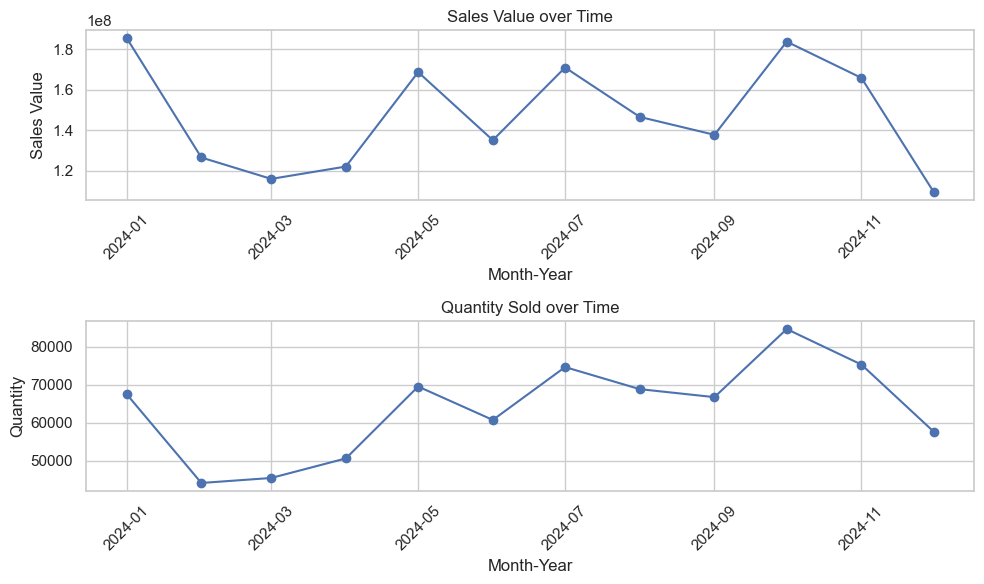

In [27]:
plt.figure(figsize=(10,6))

# Plot Value and Quantity
plt.subplot(2, 1, 1)
plt.plot(monthly_sales['Month-Year'], monthly_sales['VALUE'], marker='o', label='Sales Value')
plt.title('Sales Value over Time')
plt.xlabel('Month-Year')
plt.ylabel('Sales Value')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
plt.plot(monthly_sales['Month-Year'], monthly_sales['QUANTITY'], marker='o', label='Quantity Sold')
plt.title('Quantity Sold over Time')
plt.xlabel('Month-Year')
plt.ylabel('Quantity')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Interpretation of Anomalies in Sales Data via visual inspection

#### Sales Value Over Time:
- **Unusual Drop (Jan 2024 to Mar 2024)**: 
  - A significant drop in sales value from January to March 2024.
  - Possible reasons:
    - **Post-Holiday Slump**: Decrease in consumer spending after the holiday season.
    - **Seasonal Factors**: Typical off-season period for the business.
    - **Economic Conditions**: Economic downturn or events affecting consumer confidence.

- **Unusual Spike (May 2024)**: 
  - A noticeable spike in sales value in May 2024.
  - Possible reasons:
    - **Promotions or Sales Events**: Special promotions, sales events, or new product launches driving sales.
    - **Seasonal Demand**: Peak demand for products in May.
    - **Market Recovery**: Recovery or return to normalcy after the earlier drop.

- **Unusual Drop (Nov 2024)**:
  - A drop in sales value in November 2024.
  - Possible reasons:
    - **Pre-Holiday Adjustment**: Inventory or pricing adjustments before the holiday rush.
    - **Competition**: Increased competition or market saturation leading to reduced sales.

#### Quantity Sold Over Time:
- **Unusual Drop (Jan 2024 to Mar 2024)**:
  - A significant drop in quantity sold from January to March 2024.
  - Similar reasons as sales value, with the additional factor that a decrease in price might not have led to an expected increase in quantity, indicating a true decrease in demand.

- **Unusual Spike (May 2024)**:
  - A noticeable spike in quantity sold in May 2024.
  - Same possible reasons as for sales value, with a focus on promotions or sales events driving higher volume.

- **Unusual Drop (Nov 2024)**:
  - A drop in quantity sold in November 2024.
  - Possible reasons:
  - **Market Dynamics**: Changes in consumer behavior before the holiday season.


## 2. Z-Score Method:
Using the Z-score, we can identify anomalies. A Z-score measures how many standard deviations away a point is from the mean. Values with a Z-score greater than a certain threshold (i.e. 2 or 3) can be considered as anomalies.

In [28]:

# Calculate Z-scores for Value and Quantity
monthly_sales['VALUE_Zscore'] = zscore(monthly_sales['VALUE'])
monthly_sales['QUANTITY_Zscore'] = zscore(monthly_sales['QUANTITY'])

# Set a threshold to identify anomalies
threshold = 2  # Z-score > 2 or < -2 indicates an anomaly

# Identify anomalies for Value and Quantity
anomalies_value = monthly_sales[monthly_sales['VALUE_Zscore'].abs() > threshold]
anomalies_quantity = monthly_sales[monthly_sales['QUANTITY_Zscore'].abs() > threshold]

# Print anomalies
print("Anomalies in Sales Value:")
print(anomalies_value[['Month-Year', 'VALUE', 'VALUE_Zscore']])

print("\nAnomalies in Quantity Sold:")
print(anomalies_quantity[['Month-Year', 'QUANTITY', 'QUANTITY_Zscore']])


Anomalies in Sales Value:
Empty DataFrame
Columns: [Month-Year, VALUE, VALUE_Zscore]
Index: []

Anomalies in Quantity Sold:
Empty DataFrame
Columns: [Month-Year, QUANTITY, QUANTITY_Zscore]
Index: []


Using the Z score for monthly data, there are no anomalies detected, we proceed to check for anomalies on daily data

In [29]:
df.head()

DATE ANONYMIZED CATEGORY ANONYMIZED PRODUCT  \
0 2024-08-18 21:32:00        Category-106       Product-21f4   
1 2024-08-18 21:32:00        Category-120       Product-4156   
2 2024-08-18 21:32:00        Category-121       Product-49bd   
3 2024-08-18 21:32:00         Category-76       Product-61dd   
4 2024-08-18 21:32:00        Category-119       Product-66e0   

  ANONYMIZED BUSINESS ANONYMIZED LOCATION  QUANTITY  UNIT PRICE Month-Year  \
0       Business-de42       Location-1ba8         1       850.0 2024-08-01   
1       Business-de42       Location-1ba8         2      1910.0 2024-08-01   
2       Business-de42       Location-1ba8         1      3670.0 2024-08-01   
3       Business-de42       Location-1ba8         1      2605.0 2024-08-01   
4       Business-de42       Location-1ba8         5      1480.0 2024-08-01   

    VALUE Month-Year-Formatted  
0   850.0          August 2024  
1  3820.0          August 2024  
2  3670.0          August 2024  
3  2605.0          August 2024  
4  7400.0          August 2024

In [30]:
df.columns

Index(['DATE', 'ANONYMIZED CATEGORY', 'ANONYMIZED PRODUCT',
       'ANONYMIZED BUSINESS', 'ANONYMIZED LOCATION', 'QUANTITY', 'UNIT PRICE',
       'Month-Year', 'VALUE', 'Month-Year-Formatted'],
      dtype='object')

In [31]:
# Calculate the Z-scores for 'VALUE' and 'QUANTITY'
df['VALUE_Zscore'] = zscore(df['VALUE'])
df['QUANTITY_Zscore'] = zscore(df['QUANTITY'])

# Check the data points and Z-scores
print(df[['DATE', 'ANONYMIZED BUSINESS', 'VALUE', 'VALUE_Zscore', 'QUANTITY', 'QUANTITY_Zscore']].head())

# Optional: Define an anomaly threshold (e.g., Z-score > 2 or < -2)
threshold = 2
value_anomalies = df[df['VALUE_Zscore'].abs() > threshold]
quantity_anomalies = df[df['QUANTITY_Zscore'].abs() > threshold]

# Output anomalies (if any)
print("Anomalies in Sales Value (Z-score > 2 or < -2):")
print(value_anomalies[['DATE', 'ANONYMIZED BUSINESS', 'VALUE', 'VALUE_Zscore']])

print("Anomalies in Quantity Sold (Z-score > 2 or < -2):")
print(quantity_anomalies[['DATE', 'ANONYMIZED BUSINESS', 'QUANTITY', 'QUANTITY_Zscore']])

                 DATE ANONYMIZED BUSINESS   VALUE  VALUE_Zscore  QUANTITY  \
0 2024-08-18 21:32:00       Business-de42   850.0     -0.412339         1   
1 2024-08-18 21:32:00       Business-de42  3820.0     -0.140960         2   
2 2024-08-18 21:32:00       Business-de42  3670.0     -0.154666         1   
3 2024-08-18 21:32:00       Business-de42  2605.0     -0.251978         1   
4 2024-08-18 21:32:00       Business-de42  7400.0      0.186157         5   

   QUANTITY_Zscore  
0        -0.350738  
1        -0.085330  
2        -0.350738  
3        -0.350738  
4         0.710892  
Anomalies in Sales Value (Z-score > 2 or < -2):
                      DATE ANONYMIZED BUSINESS    VALUE  VALUE_Zscore
27     2024-05-23 20:22:00       Business-22a2  29350.0      2.191802
28     2024-05-23 20:22:00       Business-22a2  30630.0      2.308760
82     2024-11-20 20:18:00       Business-5613  31250.0      2.365412
83     2024-06-05 13:31:00       Business-624b  59250.0      4.923866
135    2024-0

In [32]:
df.shape

(329881, 12)

### Interpretation of Anomalies Detected  

#### **1. Number of Anomalies Detected**  
- **Sales Value Anomalies:** 7,568 data points have Z-scores above 2 or below -2.  
- **Quantity Sold Anomalies:** 13,736 data points fall outside the same threshold.  

#### **2. Proportion of Anomalies in the Dataset**  
Given the total dataset size of **329,881 rows**, the percentage of anomalies detected is:  

- **Sales Value Anomalies:**  
  $$
  \left(\frac{7568}{329881}\right) \times 100 \approx 2.29\% 
  $$

- **Quantity Sold Anomalies:**  
  $$
  \left(\frac{13736}{329881}\right) \times 100 \approx 4.16\%
  $$

This indicates that around **2.29% of the records show unusual behavior in sales value**, while **4.16% exhibit anomalies in quantity sold**.  

#### **3. Daily Data Analysis of Anomalies**  
If the data spans multiple months, the daily impact of anomalies can be estimated. Assuming the dataset covers **a full year (~365 days)**, the average number of anomalies per day is:  

- **Sales Value Anomalies per Day:**  
  $$
  \frac{7568}{365} \approx 21 \text{ anomalies per day}
  $$

- **Quantity Sold Anomalies per Day:**  
  $$
  \frac{13736}{365} \approx 38 \text{ anomalies per day}
  $$

Thus, **on average, around 21 unusual sales values and 38 unusual quantity transactions occur per day**.  

#### **4. Significance of the Findings**  

- **Low Proportion of Anomalies:**  
  The anomalies make up a small percentage of the total dataset, suggesting that most transactions follow expected trends. This indicates that while irregularities exist, they are not dominant.  

- **Business Insights:**  
  - The presence of anomalies in sales value suggests certain transactions had significantly higher or lower-than-usual revenue. This could be due to factors such as bulk purchases, seasonal promotions, price changes, or errors in data recording.  
  - Anomalies in quantity sold might indicate large one-time purchases, supply chain issues, or sudden demand spikes/drops.  

- **Decision-Making:**  
  - If anomalies correlate with known business events (e.g., holiday sales, discounts, or market disruptions), they may not be concerning.  
  - If unexplained anomalies exist, further investigation into **operational, pricing, or demand factors** is required.  
  - A **refined anomaly detection threshold** could improve the precision of identifying true outliers.


3. Moving Average Method:

Use moving averages to detect anomalies by calculating a rolling mean and standard deviation, then flagging values that deviate significantly.

In [33]:
# Calculate moving average and standard deviation for Value
monthly_sales['VALUE_MA'] = monthly_sales['VALUE'].rolling(window=3).mean()
monthly_sales['VALUE_STD'] = monthly_sales['VALUE'].rolling(window=3).std()

# Calculate upper and lower bounds (2 standard deviations away from moving average)
monthly_sales['Upper_Bound'] = monthly_sales['VALUE_MA'] + 2 * monthly_sales['VALUE_STD']
monthly_sales['Lower_Bound'] = monthly_sales['VALUE_MA'] - 2 * monthly_sales['VALUE_STD']

# Identify anomalies based on bounds
anomalies_moving_average = monthly_sales[(monthly_sales['VALUE'] > monthly_sales['Upper_Bound']) | 
                                          (monthly_sales['VALUE'] < monthly_sales['Lower_Bound'])]

# Print anomalies
print("Anomalies based on Moving Average Method:")
print(anomalies_moving_average[['Month-Year', 'VALUE', 'VALUE_MA', 'Upper_Bound', 'Lower_Bound']])


Anomalies based on Moving Average Method:
Empty DataFrame
Columns: [Month-Year, VALUE, VALUE_MA, Upper_Bound, Lower_Bound]
Index: []


No anolamies detected using MA for monthly analysis

### **Conclusion on Anomalies Detected**

#### **1. Monthly Data Analysis (No Anomalies Detected)**  
Using the **Visual Inspection**, **the Z-Score** and **Moving Average Method** for anomaly detection in the monthly data, no anomalies were detected. This suggests that when analyzing sales trends on a monthly basis, the overall data does not exhibit large fluctuations or outliers beyond the calculated bounds. The absence of anomalies in this analysis implies that sales trends are relatively stable on a monthly scale.

#### **2. Daily Data Analysis (Minimal Anomalies Detected)**  
However, when analyzing the daily data, a **small percentage of anomalies** were identified:

- **Sales Value Anomalies:** 2.29% of records showed irregular sales behavior.
- **Quantity Sold Anomalies:** 4.16% of records exhibited unusual quantity transactions.

Given the size of the dataset (**329,881 rows**), the number of anomalies detected on a **daily basis** is minimal:
- **On average, around 21 unusual sales values** and **38 unusual quantity transactions** occur per day.

#### **3. Interpretation of Results**  
- **Proportion of Anomalies:** The percentage of anomalies in the daily data is relatively small, indicating that while irregularities exist, they do not constitute a significant portion of the total transactions. These anomalies may result from factors such as bulk purchases, data entry errors, or specific market events (e.g., sales promotions or external economic factors).
  
- **Significance for Business Operations:**  
  - Most transactions follow expected patterns, and the detected anomalies are not overwhelmingly frequent.
  - The anomalies could represent business events that are already understood (e.g., promotions or holidays) or potential operational issues that could be explored further.
  
- **No Action Required for Monthly Data:** Since no anomalies were detected in the monthly analysis, the trends are considered stable at the monthly level.
  
- **Actionable Insights from Daily Anomalies:** The daily anomalies detected, while minimal, could be valuable for further exploration, especially if they correlate with known business events or changes in customer behavior. 


In [34]:
df.columns

Index(['DATE', 'ANONYMIZED CATEGORY', 'ANONYMIZED PRODUCT',
       'ANONYMIZED BUSINESS', 'ANONYMIZED LOCATION', 'QUANTITY', 'UNIT PRICE',
       'Month-Year', 'VALUE', 'Month-Year-Formatted', 'VALUE_Zscore',
       'QUANTITY_Zscore'],
      dtype='object')

In [35]:
# Extract relevant columns for correlation analysis
df_corr = df[['QUANTITY', 'VALUE']]

In [36]:
df_corr.head()

QUANTITY   VALUE
0         1   850.0
1         2  3820.0
2         1  3670.0
3         1  2605.0
4         5  7400.0

In [37]:
df_corr.isna().sum()

QUANTITY    0
VALUE       0
dtype: int64

Pearson Correlation Coefficient between Quantity and Value: 0.8353


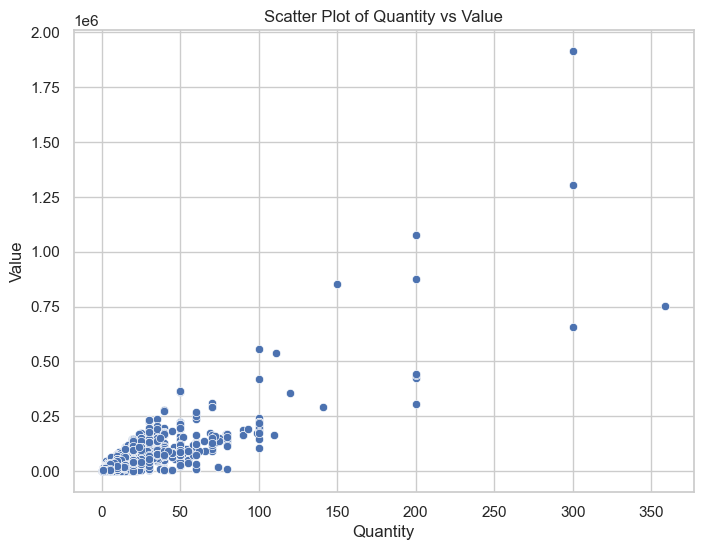

In [38]:
# Calculate the Pearson correlation coefficient
corr_coefficient, _ = pearsonr(df_corr['QUANTITY'], df_corr['VALUE'])

# Display the correlation coefficient
print(f"Pearson Correlation Coefficient between Quantity and Value: {corr_coefficient:.4f}")

# Plotting the scatter plot for visual inspection
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_corr, x='QUANTITY', y='VALUE')
plt.title('Scatter Plot of Quantity vs Value')
plt.xlabel('Quantity')
plt.ylabel('Value')
plt.show()

### Interpretation of the Correlation Analysis Between **Quantity** and **Value**:

#### **1. Pearson Correlation Coefficient**  
- The Pearson correlation coefficient between **Quantity** and **Value** is **0.8353**, indicating a strong **positive correlation**. This means that as the **quantity** increases, the **value** tends to increase as well. This is typical in transactional data, where higher quantities usually lead to higher total sales value, assuming a consistent price per unit.

#### **2. General Observations**  
- **Positive Correlation**: As mentioned, a strong positive correlation exists between the two variables, suggesting that **higher quantities sold generally lead to higher sales value**.
  
- **Varying Value for Similar Quantities**: Even though there's a positive correlation, **values can vary for similar quantities**. This could be due to:
  - **Price variations**: Different products may have different prices, influencing the total value even for similar quantities.
  - **Discounts or Promotions**: Bulk purchases or discounts might result in lower per-unit prices, causing the value to fluctuate even if the quantity remains the same.
  
- **Potential Outliers**: The presence of **outliers**, especially in the **top-right corner** (high quantity and high value), is significant. These points could represent:
  - **Bulk orders or high-value items** that drastically affect total sales value.
  - **Promotions** or **seasonal spikes** in demand that resulted in unusually high quantities and values.
  - **Errors** in data entry that need to be verified.

#### **3. Specific Areas of Interest in the Data**  
- **Low Quantity Range (0-50)**:
  - **Concentration of Data**: A majority of the data points are found in this range, indicating that most transactions involve small quantities.
  - **Low Values**: Transactions in this range generally involve lower values, suggesting that smaller purchases make up a significant portion of total transactions.

- **Mid Quantity Range (50-200)**:
  - **Noticeable Increase in Value**: As quantities increase, there’s a more consistent increase in the value, though not perfectly linear. This might represent **regular transactions with moderate quantities**.
  
- **High Quantity Range (200+)**:
  - **Fewer Data Points, Higher Values**: There are fewer transactions in this range, but the values tend to be significantly higher. This could indicate **bulk orders** or **special cases**, possibly contributing to the potential outliers observed in the top-right corner of the scatter plot.

#### **Conclusion**  
The strong **positive correlation** between **Quantity** and **Value** is expected and aligns with typical business behavior, where larger quantities sold lead to higher sales value. However, the presence of **outliers** and the **variation in value** for similar quantities suggest that additional factors, like **product pricing**, **discounts**, or **bulk purchases**, are influencing the total sales value. 

Further investigation into the **outliers** and the **relationship between price and quantity** can provide additional insights into what factors are driving sales performance.


# **Section 4: Strategic Insights and Recommendations (20 points)**

Product Strategy: Based on your analysis, recommend one product category to prioritize for marketing campaigns. Justify your choice using the data.

### Introduction

1. **Analyze Sales Performance for Product Categories**  
Evaluate the sales performance across different product categories by considering the total sales value and quantity sold. This will highlight categories that consistently perform well and contribute significantly to overall revenue.

2. **Identify High-Value, High-Demand Products**  
Products that show a strong correlation between value and quantity sold are worth prioritizing for marketing. These categories could benefit from targeted campaigns that drive even higher sales.


In [39]:
# Grouping by 'ANONYMIZED CATEGORY' to calculate total sales value and quantity for each category
category_performance = df.groupby('ANONYMIZED CATEGORY').agg(
    total_value=('VALUE', 'sum'),
    total_quantity=('QUANTITY', 'sum'),
    average_price=('UNIT PRICE', 'mean')
).reset_index()

# Sorting by total value and total quantity to identify high performing categories
category_performance_sorted = category_performance.sort_values(by=['total_value', 'total_quantity'], ascending=False)

category_performance_sorted.head(10)  # Displaying top 10 product categories based on total value and quantity

ANONYMIZED CATEGORY   total_value  total_quantity  average_price
25         Category-75  5.446587e+08          151330    3800.678934
26         Category-76  3.449396e+08           71719    4786.230632
18        Category-120  3.191787e+08          169715    1891.191646
0         Category-100  1.349028e+08           76824    1644.413782
17        Category-119  1.034548e+08           68332    1520.603591
27         Category-77  7.674138e+07           28455    2670.184528
38         Category-91  4.415210e+07           20853    2248.431376
1         Category-101  3.562652e+07           19585    1842.410128
34         Category-85  3.376253e+07           22997    1578.951671
19        Category-121  2.232764e+07           14669    1673.355308

## *Recommendation:*

Given the analysis, Category-75 should be prioritized for marketing campaigns. Its combination of high total value, large quantity sold, and premium pricing makes it a prime candidate for campaigns designed to boost its already significant sales. Targeted campaigns for Category-75 could include highlighting its premium nature, possibly bundling or offering loyalty programs to increase both the quantity sold and revenue.

## Customer Retention: Identify businesses that have reduced their purchase frequency over time. Suggest strategies to re-engage these customers.

In [40]:

# Step 1: Convert 'DATE' column to datetime if it's not already
df['DATE'] = pd.to_datetime(df['DATE'])

# Step 2: Extract month and year from the 'DATE' column to track monthly purchases
df['Month-Year'] = df['DATE'].dt.to_period('M')

# Step 3: Group by 'ANONYMIZED BUSINESS' and 'Month-Year' and count the number of purchases (transactions) for each business per month
business_purchase_counts = df.groupby(['ANONYMIZED BUSINESS', 'Month-Year']).size().reset_index(name='purchase_count')

# Step 4: Calculate the change in purchase frequency for each business between consecutive months
business_purchase_counts['purchase_change'] = business_purchase_counts.groupby('ANONYMIZED BUSINESS')['purchase_count'].diff()

# Step 5: Identify businesses with a decrease in purchase frequency (negative change)
reduced_frequency_businesses = business_purchase_counts[business_purchase_counts['purchase_change'] < 0]

# Step 6: Identify businesses that have consistently reduced their purchase frequency (you can set a threshold for consistency)
# if a business has decreased frequency for 3 consecutive months, flag it.
consistently_reduced_businesses = reduced_frequency_businesses.groupby('ANONYMIZED BUSINESS').filter(lambda x: len(x) >= 3)

# Print the businesses with reduced purchase frequency
print(consistently_reduced_businesses.head())




   ANONYMIZED BUSINESS Month-Year  purchase_count  purchase_change
14       Business-0072    2024-09              10            -13.0
16       Business-0072    2024-11              11            -11.0
17       Business-0072    2024-12              10             -1.0
19       Business-0078    2024-02              11             -1.0
21       Business-0078    2024-04              18            -11.0


In [41]:
# Additionally, list businesses that have experienced a significant drop (e.g., decrease by 50% or more)
# Make recommendatins for these
significant_drop_businesses = reduced_frequency_businesses[reduced_frequency_businesses['purchase_change'] <= -0.5 * reduced_frequency_businesses['purchase_count']]
print(significant_drop_businesses.tail())

      ANONYMIZED BUSINESS Month-Year  purchase_count  purchase_change
20671       Business-ffb1    2024-03              14            -11.0
20672       Business-ffb1    2024-09               8             -6.0
20676       Business-ffd2    2024-06               3             -2.0
20678       Business-ffd2    2024-09               4             -4.0
20682       Business-ffff    2024-12              16            -32.0


In [42]:
# Sorting businesses by purchase change in descending order (most negative at the top)
sorted_businesses = reduced_frequency_businesses.sort_values(by='purchase_change', ascending=True)

# Displaying the top rows
print(sorted_businesses.head())


      ANONYMIZED BUSINESS Month-Year  purchase_count  purchase_change
533         Business-07de    2024-11              59           -157.0
9085        Business-6baf    2024-09              17           -138.0
16745       Business-cb1f    2024-11             315           -136.0
2937        Business-245e    2024-02              62           -134.0
10184       Business-78a8    2024-06              38           -122.0


### Poorest Performing Business

The poorest performing business, based on the largest decrease in purchase frequency, is:

- **Business-07de** with a purchase change of **-157.0** from **59** purchases.

### Recommendations for Re-engaging Businesses with Reduced Purchase Frequency

1. **Targeted Communication and Promotions**
   - Reach out directly to businesses with personalized communication, offering special promotions or discounts based on their purchasing history.

2. **Product Bundling and Upselling**
   - Offer tailored product bundles or upsell opportunities to businesses, encouraging them to purchase more at a competitive price.

3. **Loyalty Programs and Volume-Based Incentives**
   - Implement loyalty programs with rewards for returning businesses, and offer volume-based incentives to encourage frequent purchases.

4. **Customer Feedback and Support**
   - Actively seek feedback to understand reasons for reduced purchases and offer dedicated support to address concerns and improve the customer experience.

5. **Seasonal Promotions or New Product Launches**
   - Run targeted campaigns during seasonal periods or launch new products to reignite interest and motivate businesses to return to regular purchasing behavior.


## Operational Efficiency:Suggest improvements to inventory management or supply chain processes based on trends in product performance and seasonal demand.


### Operational Efficiency Recommendations

1. **Focus on High-Demand Categories**
   - Based on the analysis, categories like **Category-75** and **Category-76** have shown consistently high sales value and quantity. Prioritize these categories for efficient inventory planning to avoid stockouts during high-demand periods.

2. **Adjust Stock Levels Based on Seasonal Trends**
   - For categories with seasonal spikes, such as **Category-120**, which shows fluctuations in sales, align inventory replenishment to anticipated demand peaks. This reduces excess stock and ensures availability during key selling months.

3. **Optimize Storage for High-Value Products**
   - For categories with higher average prices (e.g., **Category-75** with an average price of 3,800), consider more secure or premium storage options to protect high-value items and minimize shrinkage.

4. **Review Low-Performing Product Categories**
   - Categories like **Category-91**, with relatively lower sales, may benefit from a reduction in inventory to free up warehouse space for higher-performing categories. Alternatively, consider rebranding or repositioning to boost sales.

5. **Implement Agile Supply Chain Strategies**
   - For categories with significant monthly fluctuations in sales, use agile supply chain strategies to enable faster response times, such as shorter lead times or local suppliers for quicker replenishment during sudden demand spikes.


# **Section 5: Dashboard and Reporting (20 points)**

In [43]:
df.columns

Index(['DATE', 'ANONYMIZED CATEGORY', 'ANONYMIZED PRODUCT',
       'ANONYMIZED BUSINESS', 'ANONYMIZED LOCATION', 'QUANTITY', 'UNIT PRICE',
       'Month-Year', 'VALUE', 'Month-Year-Formatted', 'VALUE_Zscore',
       'QUANTITY_Zscore'],
      dtype='object')

In [44]:
df['Month-Year'] = df['Month-Year'].astype(str)

In [45]:
# 1. Total Quantity and Value by Anonymized Category
category_sales = df.groupby('ANONYMIZED CATEGORY').agg(
    total_quantity=('QUANTITY', 'sum'),
    total_value=('VALUE', 'sum')
).reset_index()

# 2. Top-Performing Products and Businesses (Top 10)
top_products = df.groupby('ANONYMIZED PRODUCT').agg(
    total_quantity=('QUANTITY', 'sum'),
    total_value=('VALUE', 'sum')
).nlargest(10, 'total_value').reset_index() 

top_businesses = df.groupby('ANONYMIZED BUSINESS').agg(
    total_quantity=('QUANTITY', 'sum'),
    total_value=('VALUE', 'sum')
).nlargest(10, 'total_value').reset_index()  

# 3. Time-series Chart of Sales Trends (Monthly Data)
sales_time_series = df.groupby('Month-Year').agg(
    total_quantity=('QUANTITY', 'sum'),
    total_value=('VALUE', 'sum')
).reset_index()

# 4. Time-series Chart of Daily Data (For the DatePickerRange feature)
daily_sales_time_series = df.groupby('DATE').agg(
    total_quantity=('QUANTITY', 'sum'),
    total_value=('VALUE', 'sum')
).reset_index()

# 5. Segmentation Summary (for both business and category segmentation based on Value or Quantity)
def create_segmentation(df, group_column, based_on='Value'):
    # Group by the specified column and calculate total quantity, value, and frequency
    segmentation = df.groupby(group_column).agg(
        Total_Quantity=('QUANTITY', 'sum'),
        Total_Value=('VALUE', 'sum'),
        Frequency=('DATE', 'nunique')
    ).reset_index()

    if based_on == 'Value':
        # Define thresholds based on Total Value
        high_value_threshold = segmentation['Total_Value'].quantile(0.75)
        medium_value_threshold = segmentation['Total_Value'].quantile(0.50)

        # Create a new column 'Segment' to classify based on Total Value
        def classify(row):
            if row['Total_Value'] >= high_value_threshold:
                return 'High Value'
            elif row['Total_Value'] >= medium_value_threshold:
                return 'Medium Value'
            else:
                return 'Low Value'

    elif based_on == 'Quantity':
        # Define thresholds based on Total Quantity
        high_quantity_threshold = segmentation['Total_Quantity'].quantile(0.75)
        medium_quantity_threshold = segmentation['Total_Quantity'].quantile(0.50)

        # Create a new column 'Segment' to classify based on Total Quantity
        def classify(row):
            if row['Total_Quantity'] >= high_quantity_threshold:
                return 'High Quantity'
            elif row['Total_Quantity'] >= medium_quantity_threshold:
                return 'Medium Quantity'
            else:
                return 'Low Quantity'

    segmentation['Segment'] = segmentation.apply(classify, axis=1)

    return segmentation

# Apply segmentation for both 'ANONYMIZED BUSINESS' and 'ANONYMIZED CATEGORY'
business_segmentation_value = create_segmentation(df, 'ANONYMIZED BUSINESS', based_on='Value')
category_segmentation_value = create_segmentation(df, 'ANONYMIZED CATEGORY', based_on='Value')

business_segmentation_quantity = create_segmentation(df, 'ANONYMIZED BUSINESS', based_on='Quantity')
category_segmentation_quantity = create_segmentation(df, 'ANONYMIZED CATEGORY', based_on='Quantity')

# Create the Dash app
app = dash.Dash(__name__)

app.layout = html.Div([ 
    html.H1("Sales Dashboard", style={'text-align': 'center'}),

    # 1. Total Quantity and Value by Anonymized Category
    dcc.Graph(
        id='category-sales',
        figure=px.bar(category_sales, 
                      x='ANONYMIZED CATEGORY', 
                      y=['total_quantity', 'total_value'], 
                      title="Total Quantity and Value by Anonymized Category")
    ),

    # 2. Top-Performing Products and Businesses (Top 10)
    html.Div([
        dcc.Graph(
            id='top-products',
            figure=px.bar(top_products, 
                          x='ANONYMIZED PRODUCT', 
                          y=['total_quantity', 'total_value'], 
                          title="Top-Performing Products")
        )
    ], style={'display': 'inline-block', 'width': '48%', 'padding': '10px'}),

    html.Div([
        dcc.Graph(
            id='top-businesses',
            figure=px.bar(top_businesses, 
                          x='ANONYMIZED BUSINESS', 
                          y=['total_quantity', 'total_value'], 
                          title="Top-Performing Businesses")
        )
    ], style={'display': 'inline-block', 'width': '48%', 'padding': '10px'}),

    # Monthly Time-series Chart
    dcc.Graph(
        id='sales-monthly-trend',
        figure=px.line(sales_time_series, 
                       x='Month-Year', 
                       y='total_value', 
                       title="Monthly Sales Trends")
    ),

    # Add Date Picker Range for Zoom-In/Out functionality (for daily data)
    dcc.DatePickerRange(
        id='date-picker-range',
        start_date=daily_sales_time_series['DATE'].min().strftime('%Y-%m-%d'),
        end_date=daily_sales_time_series['DATE'].max().strftime('%Y-%m-%d'),
        display_format='YYYY-MM-DD',  # Adjust the date format as needed
        style={'width': '48%', 'padding': '20px'}
    ),

    # Daily Time-series Chart with Zoom Feature (interactivity for day/month views)
    dcc.Graph(
        id='sales-daily-trend',
        figure=px.line(daily_sales_time_series, 
                       x='DATE', 
                       y='total_value', 
                       title="Daily Sales Trends")
    ),

    # Segmentation Summary (Side-by-side for both Category and Business Segments)
    html.Div([
        # Category Segmentation by Value
        html.Div([
            dcc.Graph(
                id='category-segmentation-value',
                figure=px.pie(category_segmentation_value, 
                              names='Segment', 
                              values='Frequency', 
                              title="Category Segmentation by Value")
            )
        ], style={'display': 'inline-block', 'width': '48%', 'padding': '10px'}),

        # Category Segmentation by Quantity
        html.Div([
            dcc.Graph(
                id='category-segmentation-quantity',
                figure=px.pie(category_segmentation_quantity, 
                              names='Segment', 
                              values='Frequency', 
                              title="Category Segmentation by Quantity")
            )
        ], style={'display': 'inline-block', 'width': '48%', 'padding': '10px'})
    ], style={'text-align': 'center', 'margin-bottom': '30px'}),

    html.Div([
        # Business Segmentation by Value
        html.Div([
            dcc.Graph(
                id='business-segmentation-value',
                figure=px.pie(business_segmentation_value, 
                              names='Segment', 
                              values='Frequency', 
                              title="Business Segmentation by Value")
            )
        ], style={'display': 'inline-block', 'width': '48%', 'padding': '10px'}),

        # Business Segmentation by Quantity
        html.Div([
            dcc.Graph(
                id='business-segmentation-quantity',
                figure=px.pie(business_segmentation_quantity, 
                              names='Segment', 
                              values='Frequency', 
                              title="Business Segmentation by Quantity")
            )
        ], style={'display': 'inline-block', 'width': '48%', 'padding': '10px'})
    ], style={'text-align': 'center'})
])

# Callback to update daily time-series chart based on date range selection
@app.callback(
    Output('sales-daily-trend', 'figure'),
    Input('date-picker-range', 'start_date'),
    Input('date-picker-range', 'end_date')
)
def update_sales_daily_trend(start_date, end_date):
    filtered_daily_sales = daily_sales_time_series[ 
        (daily_sales_time_series['DATE'] >= start_date) & 
        (daily_sales_time_series['DATE'] <= end_date)
    ]
    return px.line(filtered_daily_sales, 
                   x='DATE', 
                   y='total_value', 
                   title="Daily Sales Trends")

if __name__ == '__main__':
    app.run_server(debug=True)



# Sales Dashboard Summary

The Sales Dashboard provides an interactive and visual representation of sales performance data, categorized by anonymized business and product segments. The dashboard includes multiple sections to analyze total sales, trends, and segmented data. Key features include:

### 1. **Total Quantity and Value by Anonymized Category**
   - A bar chart displays the total quantity and value of sales by anonymized category.
   - This helps to quickly compare the performance across different categories.

### 2. **Top-Performing Products and Businesses**
   - **Top-Performing Products (Top 10):** A bar chart displaying the top 10 products based on total sales value.
   - **Top-Performing Businesses (Top 10):** A bar chart showing the top 10 businesses based on total sales value.
   - These charts help identify the best-performing products and businesses in terms of sales.

### 3. **Sales Trends Over Time**
   - **Monthly Sales Trends:** A line chart displays the monthly sales trends, showing how total sales values change over time.
   - **Daily Sales Trends:** A line chart displays daily sales trends, with a DatePickerRange allowing users to zoom in and out by selecting a specific date range.

### 4. **Segmentation Summary**
   - **Category Segmentation by Value:** A pie chart showing the segmentation of anonymized categories based on total value (high, medium, and low).
   - **Category Segmentation by Quantity:** A pie chart showing segmentation based on total quantity.
   - **Business Segmentation by Value:** A pie chart showing the segmentation of anonymized businesses based on total value.
   - **Business Segmentation by Quantity:** A pie chart showing segmentation based on total quantity.
   - These visualizations provide insights into how sales are distributed across different segments based on both value and quantity.

### 5. **Interactivity**
   - The dashboard allows one to filter daily sales data by selecting a date range, offering flexibility in exploring the data.


# **Bonus Section: Open-Ended Problem (Optional, 10 points)**

## Bonus Section: Open-Ended Problem (Optional, 10 points)

### Predictive Analysis: Identifying External Factors Influencing Sales

Several external factors can influence sales patterns, and incorporating these into predictive analyses can significantly improve the accuracy of sales forecasts. Some of these factors include:

1. **Economic Conditions**: Economic indicators such as GDP growth, inflation rates, and unemployment levels can impact consumer purchasing behavior. For example, during a recession, people might reduce discretionary spending, affecting product sales.
   - **Methodology**: To incorporate economic conditions, we could use external economic datasets (e.g., GDP, inflation, or unemployment rate data) and merge them with the sales data based on relevant time periods (e.g., monthly or quarterly). Regression models or time-series models like ARIMA can be used to integrate these factors with historical sales data.

2. **Competitor Actions**: Competitor pricing, marketing strategies, and product launches can all have an effect on sales performance.
   - **Methodology**: This information can be gathered by monitoring competitors’ actions via web scraping, public news, or third-party market research reports. Sentiment analysis and event-driven models can help quantify the effects of competitor actions and integrate these into predictive models.

3. **Seasonality and Holidays**: Sales are often influenced by seasonal trends (e.g., summer or holiday seasons). Understanding patterns based on seasons, holidays, or cultural events can improve forecasts.
   - **Methodology**: Time-series models (e.g., SARIMA) can be used to incorporate seasonality, or feature engineering can create categorical variables that indicate holidays, seasons, and events. Adding external time-related variables could improve model predictions.

4. **Weather Patterns**: For certain industries (e.g., retail or tourism), weather conditions can play a significant role in sales performance.
   - **Methodology**: Historical weather data (temperature, rainfall, etc.) could be integrated into the model by using it as a feature in a machine learning algorithm or time-series model.

5. **Marketing Campaigns**: Promotions, discounts, and advertising can drive sales spikes, influencing both short-term and long-term sales trends.
   - **Methodology**: Track marketing campaigns, using the start and end dates as features in the model. Analyzing the correlation between marketing efforts and sales can help estimate the effectiveness of different strategies.

### Scalability: Optimizing for a 10x Larger Dataset

If the dataset were to grow 10 times larger, we would need to implement strategies for data storage, processing, and analysis to handle the increased volume efficiently. Here’s how we can optimize:

1. **Data Storage Optimization**:
   - **Database**: Move from in-memory storage (e.g., Pandas DataFrames) to a robust relational database (SQL) or a NoSQL database (e.g., MongoDB) for scalable, long-term storage.
   - **Data Partitioning**: Partition the data by date (e.g., year/month) or product/business type to distribute the load and make it more manageable for queries.

2. **Data Processing Optimization**:
   - **Parallel Processing**: Use tools like Dask or Apache Spark to perform parallel processing. This would allow us to process chunks of the data in parallel rather than loading the entire dataset into memory.
   - **Efficient Data Aggregation**: Instead of aggregating the full dataset at once, we can pre-aggregate the data at the database level, reducing the computational overhead.
   - **Batch Processing**: Process data in smaller batches instead of loading everything at once to minimize memory usage and prevent crashes.

3. **Data Analysis Optimization**:
   - **Dimensionality Reduction**: Use dimensionality reduction techniques (e.g., PCA) for feature selection when dealing with large datasets. This can speed up model training while maintaining model performance.
   - **Model Parallelization**: Distribute model training across multiple machines or use cloud-based platforms (e.g., AWS, GCP) to take advantage of distributed computing for faster model training.
   - **Sampling**: For very large datasets, use stratified sampling to ensure that the analysis focuses on representative subsets, reducing the load on computational resources.

By implementing these optimizations, we can ensure that the system remains efficient, even as the data grows significantly in size.
